# Book Recommendation System

In [1]:
import numpy as np
import pandas as pd

In [2]:
# read books dataset
book_df = pd.read_csv("books_clean.csv")
display(book_df.head())

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.description,volumeInfo.readingModes.text,volumeInfo.readingModes.image,...,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount,volumeInfo.publishedYear,volumeInfo.industryIdentifiers.ISBN_10,volumeInfo.industryIdentifiers.ISBN_13,volumeInfo.industryIdentifiers.ISSN,volumeInfo.industryIdentifiers.OTHER
0,eIJiDwAAQBAJ,1xcHQ4mb0QM,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,Tariq Dennison,Springer,This book is a practical and concise guide to ...,True,True,...,True,SAMPLE,This book is a practical and concise guide to ...,0.0,0,2018,981130372X,9.78981E+12,Missing,Missing
1,UacEEAAAQBAJ,pQzVcEsJ4kI,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,Finance experts reveal how they save spend and...,"Brian Portnoy, Joshua Brown",Harriman House Limited,The world of investing normally sees experts t...,True,True,...,True,SAMPLE,Sometimes raw always revealing these stories d...,0.0,0,2020,857198092,9.78086E+12,Missing,Missing
2,pNI4DwAAQBAJ,2V7L2ChAUb4,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"Peir Shenq Stanley Lim, Mun Hong Cheong",John Wiley & Sons,A practical stepbystep guide to value investin...,True,True,...,True,SAMPLE,Ltd Stanley Lim and Mun Hong have skillfully w...,0.0,0,2017,1119391202,9.78112E+12,Missing,Missing
3,DBeCEAAAQBAJ,GzHy/Dvmvl0,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,David M Rubenstein,Simon and Schuster,What do the most successful investors have in ...,False,False,...,False,SAMPLE,David M Rubenstein cofounder of one of the wor...,0.0,0,2022,1982190302,9.78198E+12,Missing,Missing
4,5qCaDwAAQBAJ,7xVJ4bf3Hfc,https://www.googleapis.com/books/v1/volumes/5q...,Simply Invest,Naked Truths to Grow Your Money,Goh Yang Chye,Epigram Books,A pioneer in financial planning in Singapore G...,True,False,...,False,SAMPLE,From understanding market cycles to knowing wh...,0.0,0,2019,981478561X,9.78981E+12,Missing,Missing


In [3]:
# select subset of data (books from top 10 categories/genre)
top_10_cat = ['Fiction', 'Juvenile Fiction', 'Business & Economics', 'History', 'Social Science', 'Juvenile Nonfiction'
              , 'Biography & Autobiography', 'Literary Criticism', 'Science', 'Religion']
book_df_sub = book_df[book_df['volumeInfo.categories'].isin(top_10_cat)]

book_df_sub.shape
display(book_df_sub.head())

,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publisher,volumeInfo.description,volumeInfo.readingModes.text,volumeInfo.readingModes.image,...,accessInfo.pdf.isAvailable,accessInfo.accessViewStatus,searchInfo.textSnippet,volumeInfo.averageRating,volumeInfo.ratingsCount,volumeInfo.publishedYear,volumeInfo.industryIdentifiers.ISBN_10,volumeInfo.industryIdentifiers.ISBN_13,volumeInfo.industryIdentifiers.ISSN,volumeInfo.industryIdentifiers.OTHER
0,eIJiDwAAQBAJ,1xcHQ4mb0QM,https://www.googleapis.com/books/v1/volumes/eI...,Invest Outside the Box,Understanding Different Asset Classes and Stra...,Tariq Dennison,Springer,This book is a practical and concise guide to ...,True,True,...,True,SAMPLE,This book is a practical and concise guide to ...,0.0,0,2018,981130372X,9.78981E+12,Missing,Missing
1,UacEEAAAQBAJ,pQzVcEsJ4kI,https://www.googleapis.com/books/v1/volumes/Ua...,How I Invest My Money,Finance experts reveal how they save spend and...,"Brian Portnoy, Joshua Brown",Harriman House Limited,The world of investing normally sees experts t...,True,True,...,True,SAMPLE,Sometimes raw always revealing these stories d...,0.0,0,2020,857198092,9.78086E+12,Missing,Missing
2,pNI4DwAAQBAJ,2V7L2ChAUb4,https://www.googleapis.com/books/v1/volumes/pN...,Value Investing in Asia,The Definitive Guide to Investing in Asia,"Peir Shenq Stanley Lim, Mun Hong Cheong",John Wiley & Sons,A practical stepbystep guide to value investin...,True,True,...,True,SAMPLE,Ltd Stanley Lim and Mun Hong have skillfully w...,0.0,0,2017,1119391202,9.78112E+12,Missing,Missing
3,DBeCEAAAQBAJ,GzHy/Dvmvl0,https://www.googleapis.com/books/v1/volumes/DB...,How to Invest,Masters on the Craft,David M Rubenstein,Simon and Schuster,What do the most successful investors have in ...,False,False,...,False,SAMPLE,David M Rubenstein cofounder of one of the wor...,0.0,0,2022,1982190302,9.78198E+12,Missing,Missing
4,5qCaDwAAQBAJ,7xVJ4bf3Hfc,https://www.googleapis.com/books/v1/volumes/5q...,Simply Invest,Naked Truths to Grow Your Money,Goh Yang Chye,Epigram Books,A pioneer in financial planning in Singapore G...,True,False,...,False,SAMPLE,From understanding market cycles to knowing wh...,0.0,0,2019,981478561X,9.78981E+12,Missing,Missing


In [4]:
# save into CSV file
book_df_sub.to_csv("Books Subset.csv")

## Text Processing

In [5]:
# keep only necessary columns
book_rec_df = book_df_sub[['volumeInfo.title', 'volumeInfo.description', 'volumeInfo.categories']]

# replace Missing with empty space
book_rec_df = book_rec_df.replace("Missing", '')

# add a column： genre + author + title + description
book_rec_df['text'] = book_rec_df[['volumeInfo.title', 'volumeInfo.description', 'volumeInfo.categories']].apply(" ".join, axis=1)

display(book_rec_df.head())

,volumeInfo.title,volumeInfo.description,volumeInfo.categories,text
0,Invest Outside the Box,This book is a practical and concise guide to ...,Business & Economics,Invest Outside the Box This book is a practica...
1,How I Invest My Money,The world of investing normally sees experts t...,Business & Economics,How I Invest My Money The world of investing n...
2,Value Investing in Asia,A practical stepbystep guide to value investin...,Business & Economics,Value Investing in Asia A practical stepbystep...
3,How to Invest,What do the most successful investors have in ...,Business & Economics,How to Invest What do the most successful inve...
4,Simply Invest,A pioneer in financial planning in Singapore G...,Business & Economics,Simply Invest A pioneer in financial planning ...


In [6]:
# Random Checking
pd.set_option('display.max_colwidth', None)
book_rec_df.loc[book_rec_df['volumeInfo.title']=='Invest Outside the Box', ['text']]

,text
0,Invest Outside the Box This book is a practical and concise guide to major asset classes investment strategies and foreign markets For investors familiar with one box of investments this book serves as a nontechnical introduction to other boxes worth diversifying into such as bonds real estate private equity cryptocurrencies and Chinese Ashares Readers with no prior finance background will find this book an accessible entry point to investing Written by a practitioner this volume can serve as course material for introductory investing classes or as an onthejob guidebook for professionals and practicing investors Business & Economics


In [7]:
# Text Pre-Processing
import nltk
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Function for removing punctuations
def remove_punctuation(text):
    text = "".join([i for i in text if i not in string.punctuation])
    return text

# Function for converting into lower case
def lower_case(text):
    return text.lower()

# Function for tokenization
def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Function for removing stop words
def remove_stop_words(text):
    stopwords = nltk.corpus.stopwords.words('english')
    text = [i for i in text if i not in stopwords]
    return text

# Function for stemming
porter_stemmer = PorterStemmer()
def stem_text(text):
    stem_text = [porter_stemmer.stem(i) for i in text]
    return stem_text

# Function for lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(i) for i in text]
    return lemm_text

In [8]:
# Perform text preprocessing
book_rec_df['text_no_punc'] = book_rec_df['text'].apply(lambda x:remove_punctuation(x))
book_rec_df['text_lower'] = book_rec_df['text_no_punc'].apply(lambda x:lower_case(x))
book_rec_df['text_token'] = book_rec_df['text_lower'].apply(lambda x:tokenization(x))
book_rec_df['text_no_stop'] = book_rec_df['text_token'].apply(lambda x:remove_stop_words(x))
book_rec_df['text_stem'] = book_rec_df['text_no_stop'].apply(lambda x:stem_text(x))
book_rec_df['text_lemm'] = book_rec_df['text_stem'].apply(lambda x:lemmatize_text(x))

In [9]:
# Random Checking
pd.set_option('display.max_colwidth', None)
book_rec_df.loc[book_rec_df['volumeInfo.title']=='Invest Outside the Box', ['text', 'text_lemm']]

,text,text_lemm
0,Invest Outside the Box This book is a practical and concise guide to major asset classes investment strategies and foreign markets For investors familiar with one box of investments this book serves as a nontechnical introduction to other boxes worth diversifying into such as bonds real estate private equity cryptocurrencies and Chinese Ashares Readers with no prior finance background will find this book an accessible entry point to investing Written by a practitioner this volume can serve as course material for introductory investing classes or as an onthejob guidebook for professionals and practicing investors Business & Economics,"[invest, outsid, box, book, practic, concis, guid, major, asset, class, invest, strategi, foreign, market, investor, familiar, one, box, invest, book, serv, nontechn, introduct, box, worth, diversifi, bond, real, estat, privat, equiti, cryptocurr, chine, ashar, reader, prior, financ, background, find, book, access, entri, point, invest, written, practition, volum, serv, cours, materi, introductori, invest, class, onthejob, guidebook, profession, practic, investor, busi, econom]"


In [10]:
# Text preprocessed
book_rec_df['text_preprocessed'] = book_rec_df['text_lemm']

# Combine into sentence
book_rec_df['sentence_preprocessed'] = book_rec_df['text_preprocessed'].apply(lambda x:" ".join(x))

# Drop columns
book_rec_df.drop(['text_no_punc', 'text_lower', 'text_token', 'text_no_stop', 'text_stem', 'text_lemm'], axis=1, inplace = True)

In [11]:
display(book_rec_df.head())

,volumeInfo.title,volumeInfo.description,volumeInfo.categories,text,text_preprocessed,sentence_preprocessed
0,Invest Outside the Box,This book is a practical and concise guide to major asset classes investment strategies and foreign markets For investors familiar with one box of investments this book serves as a nontechnical introduction to other boxes worth diversifying into such as bonds real estate private equity cryptocurrencies and Chinese Ashares Readers with no prior finance background will find this book an accessible entry point to investing Written by a practitioner this volume can serve as course material for introductory investing classes or as an onthejob guidebook for professionals and practicing investors,Business & Economics,Invest Outside the Box This book is a practical and concise guide to major asset classes investment strategies and foreign markets For investors familiar with one box of investments this book serves as a nontechnical introduction to other boxes worth diversifying into such as bonds real estate private equity cryptocurrencies and Chinese Ashares Readers with no prior finance background will find this book an accessible entry point to investing Written by a practitioner this volume can serve as course material for introductory investing classes or as an onthejob guidebook for professionals and practicing investors Business & Economics,"[invest, outsid, box, book, practic, concis, guid, major, asset, class, invest, strategi, foreign, market, investor, familiar, one, box, invest, book, serv, nontechn, introduct, box, worth, diversifi, bond, real, estat, privat, equiti, cryptocurr, chine, ashar, reader, prior, financ, background, find, book, access, entri, point, invest, written, practition, volum, serv, cours, materi, introductori, invest, class, onthejob, guidebook, profession, practic, investor, busi, econom]",invest outsid box book practic concis guid major asset class invest strategi foreign market investor familiar one box invest book serv nontechn introduct box worth diversifi bond real estat privat equiti cryptocurr chine ashar reader prior financ background find book access entri point invest written practition volum serv cours materi introductori invest class onthejob guidebook profession practic investor busi econom
1,How I Invest My Money,The world of investing normally sees experts telling us the right way to manage our money How often do these experts pull back the curtain and tell us how they invest their own money Never How I Invest My Money changes that In this unprecedented collection 25 financial experts share how they navigate markets with their own capital In this honest rendering of how they invest save spend give and borrow this group of portfolio managers financial advisors venture capitalists and other experts detail the how and the why of their investments They share stories about their childhood their families the struggles they face and the aspirations they hold Sometimes raw always revealing these stories detail the indelible relationship between our money and our values Taken as a whole these essays powerfully demonstrate that there is no single right way to save spend and invest We see a kaleidoscope of perspectives on stocks bonds real assets funds charity and other means of achieving the life one desires With engaging illustrations throughout by Carl Richards How I Invest My Money inspires readers to think creatively about their financial decisions and how money figures in the broader quest for a contented life With contributions from Morgan Housel Christine Benz Brian Portnoy Joshua Brown Bob Seawright Carolyn McClanahan Tyrone Ross Dasarte Yarnway Nina ONeal Debbie Freeman Shirl Penney Ted Seides Ashby Daniels Blair duQuesnay Leighann Miko Perth Tolle Josh Rogers Jenny Harrington Mike Underhill Dan Egan Howard Lindzon Ryan Krueger Lazetta Rainey Braxton Rita Cheng Alex Chalekian,Business & Economics,How I Invest My Money The world of investing normally sees exp

## TF-IDF 

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english',max_features=1000)
tfidf_matrix = tfidf.fit_transform(book_rec_df['sentence_preprocessed'])

In [68]:
tfidf_matrix.shape

(36923, 1000)

In [14]:
# Check tfidf matrix
feature_names = tfidf.get_feature_names_out()
corpus_index = [n for n in book_rec_df['sentence_preprocessed']]
tfidf_df = pd.DataFrame(tfidf_matrix.T.todense(), index=feature_names, columns=corpus_index)
display(tfidf_df.head())

,invest outsid box book practic concis guid major asset class invest strategi foreign market investor familiar one box invest book serv nontechn introduct box worth diversifi bond real estat privat equiti cryptocurr chine ashar reader prior financ background find book access entri point invest written practition volum serv cours materi introductori invest class onthejob guidebook profession practic investor busi econom,invest money world invest normal see expert tell u right way manag money often expert pull back curtain tell u invest money never invest money chang unpreced collect 25 financi expert share navig market capit honest render invest save spend give borrow group portfolio manag financi advisor ventur capitalist expert detail invest share stori childhood famili struggl face aspir hold sometim raw alway reveal stori detail indel relationship money valu taken whole essay power demonstr singl right way save spend invest see kaleidoscop perspect stock bond real asset fund chariti mean achiev life one desir engag illustr throughout carl richard invest money inspir reader think creativ financi decis money figur broader quest content life contribut morgan housel christin benz brian portnoy joshua brown bob seawright carolyn mcclanahan tyron ross dasart yarnway nina oneal debbi freeman shirl penney ted seid ashbi daniel blair duquesnay leighann miko perth toll josh roger jenni harrington mike underhil dan egan howard lindzon ryan krueger lazetta rainey braxton rita cheng alex chalekian busi econom,valu invest asia practic stepbystep guid valu invest asian stock valu invest asia offer uniqu target guid investor seek new opportun asian market valu invest advic gear toward u market leav key guidanc pertain specif invest publicli list asian compani guidanc critic success book focus opportun challeng asian market includ current histor case studi illustr variou success risk pitfal stepbystep guidanc help unearth great opportun asia understand macroeconom situat narrow specif invest opportun invalu new experienc investor practic refer show appli valu invest principl specif asian stock invest asia come inher set uniqu challeng must understood decis made challeng result oper practic result regulatori issu other come market yet regardless sourc valu investor particular bear brunt obstacl book show need know invest intellig asian compani stepbystep approach guid investor toward practic applic valu invest principl asia navig challeng uniqu asian invest examin reallif case studi illustr risk opportun delv key market greater china southeast asia includ exclus interview wellknown valu investor asia despit challeng risk asian market repres signific opportun especi investor seek valu valu invest asia offer practic refer new experienc investor realworld guidanc toward intellig invest asian market busi econom,invest success investor common david rubenstein cofound one world largest invest firm spent year interview greatest investor world discov timetest principl hardearn wisdom indispens tool guid practicecprovid publish busi econom,simpli invest pioneer financi plan singapor goh yang chye debunk sever misconcept show socal expert better averag sevenyearold pick stock invest simpl look evid tell u shouldnt trust industri jargon cryptocurr good invest singapor love affair properti mistak medium alway get wrong overreact understand market cycl know exactli ask financi advis book teach secur financi futureand enjoy journey busi econom,nft handbook learn creat profit nft nft handbook detail guid creat sell buy nonfung token without need technic background learn exactli nft evolv valu well delv differ type aspect nft discus differ nft marketplac pro con creat nft step step instruct aspect nft creation includ type content use sourc content ad artist design write nft descript ad option unlock content set option ongo royalti mint nft youll learn process get nft blockchain sell nft well go whole process includ creat collect differ option set price star

## Dimensionality Reduction using SVD

In [15]:
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings('ignore')

# Find the optimal number of components for Truncated SVD
no_comp = [5,10,20,50,100,200,500,700,800,900,1000]

# Explained variance ratio for each component of Truncated SVD
explained = [] 
for x in no_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit_transform(tfidf_matrix)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))

Number of components = 5 and explained variance = 0.04848310341612358
Number of components = 10 and explained variance = 0.08343671357210268
Number of components = 20 and explained variance = 0.12981478476476746
Number of components = 50 and explained variance = 0.21941531635143863
Number of components = 100 and explained variance = 0.31931737231637436
Number of components = 200 and explained variance = 0.4636765629082539
Number of components = 500 and explained variance = 0.7429264986256788
Number of components = 700 and explained variance = 0.8684632927423452
Number of components = 800 and explained variance = 0.9197794989076737
Number of components = 900 and explained variance = 0.964045014600001
Number of components = 1000 and explained variance = 0.9999999999999999


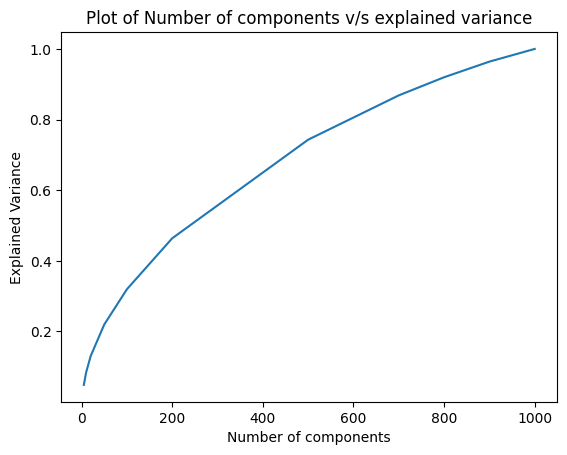

In [16]:
import matplotlib.pyplot as plt

plt.plot(no_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [24]:
# Check if components = 600 get 80% of the variance
explained = []
svd = TruncatedSVD(n_components=600)
svd.fit_transform(tfidf_matrix)
explained.append(svd.explained_variance_ratio_.sum())
print("Number of components = 600 and explained variance = %r"%(svd.explained_variance_ratio_.sum()))

Number of components = 600 and explained variance = 0.8099188224022718


In [25]:
svd = TruncatedSVD(n_components=600)
svd_data = svd.fit_transform(tfidf_matrix)

## Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

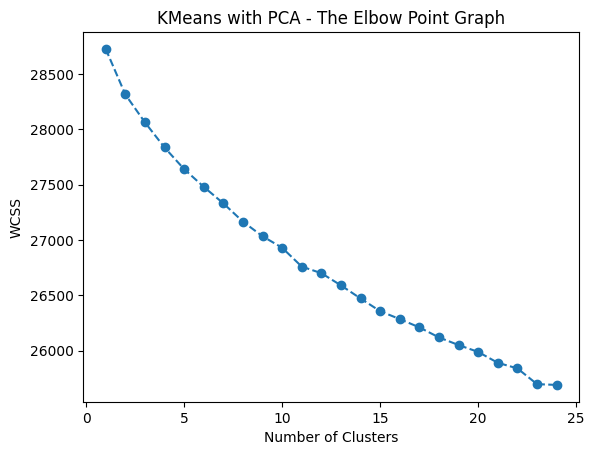

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# fit k-means using the tf-idf vector
wcss = []
# for loop to find the wcss value
for i in range(1,25):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(svd_data)
    wcss.append(kmeans.inertia_)
    
# determine the optimal number of clusters using Elbow method
plt.plot(range(1,25), wcss, marker = 'o', linestyle = '--')
plt.title('KMeans with PCA - The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

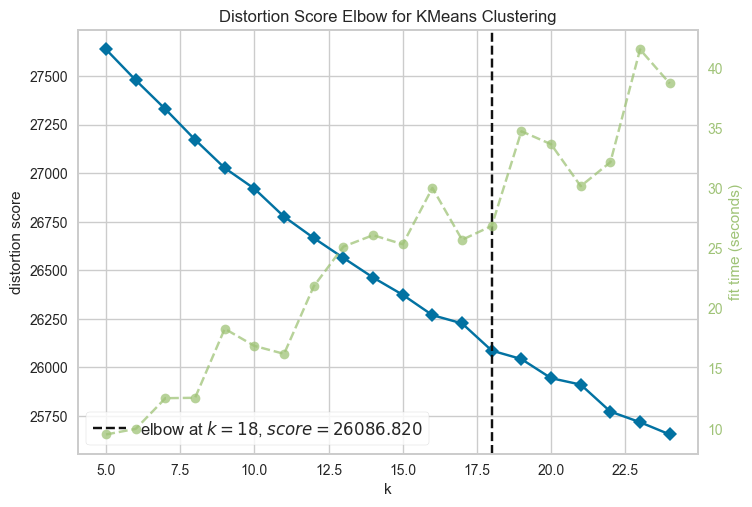

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
elb_visualizer = KElbowVisualizer(model, k=(5,25))
elb_visualizer.fit(svd_data)    
elb_visualizer.show()

In [83]:
# Implementation of kmeans using PCA with 18 clusters
kmeans_18 = KMeans(n_clusters = 18, init = 'k-means++')
kmeans_18.fit(svd_data)

KMeans(n_clusters=18)

## Evaluation

### Davies-Bouldin index

In [40]:
from sklearn.metrics import davies_bouldin_score

#To calculate the overall davies bouldin score
#The lower the value, the better the model's performance.
davies = davies_bouldin_score(svd_data, kmeans_18.labels_)
print("Davies-Bouldin index: {:.4f}".format(davies))

Davies-Bouldin index: 4.7713


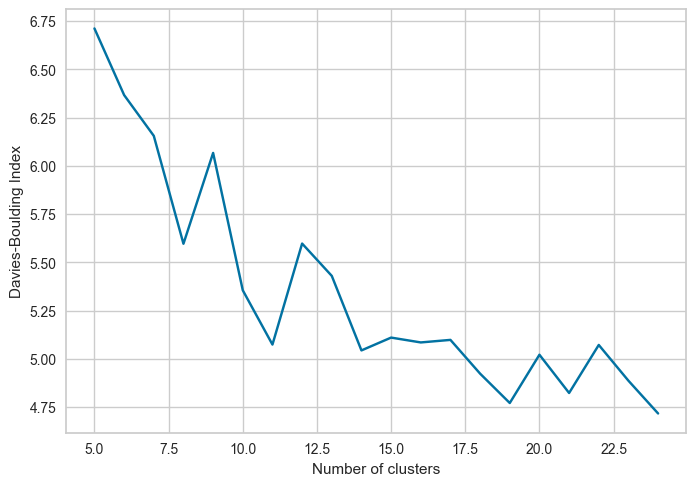

In [41]:
from sklearn.metrics import davies_bouldin_score

results = {}

for i in range(5,25):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(svd_data)
    db_index = davies_bouldin_score(svd_data, kmeans.labels_)
    results.update({i: db_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

## Book Recommendation

In [84]:
# map the dataframe with the asigned clusters
book_df_kmeans = book_rec_df.copy()
book_df_kmeans['segment'] = kmeans_18.labels_

display(book_df_kmeans.head())

,volumeInfo.title,volumeInfo.description,volumeInfo.categories,text,text_preprocessed,sentence_preprocessed,segment
0,Invest Outside the Box,This book is a practical and concise guide to major asset classes investment strategies and foreign markets For investors familiar with one box of investments this book serves as a nontechnical introduction to other boxes worth diversifying into such as bonds real estate private equity cryptocurrencies and Chinese Ashares Readers with no prior finance background will find this book an accessible entry point to investing Written by a practitioner this volume can serve as course material for introductory investing classes or as an onthejob guidebook for professionals and practicing investors,Business & Economics,Invest Outside the Box This book is a practical and concise guide to major asset classes investment strategies and foreign markets For investors familiar with one box of investments this book serves as a nontechnical introduction to other boxes worth diversifying into such as bonds real estate private equity cryptocurrencies and Chinese Ashares Readers with no prior finance background will find this book an accessible entry point to investing Written by a practitioner this volume can serve as course material for introductory investing classes or as an onthejob guidebook for professionals and practicing investors Business & Economics,"[invest, outsid, box, book, practic, concis, guid, major, asset, class, invest, strategi, foreign, market, investor, familiar, one, box, invest, book, serv, nontechn, introduct, box, worth, diversifi, bond, real, estat, privat, equiti, cryptocurr, chine, ashar, reader, prior, financ, background, find, book, access, entri, point, invest, written, practition, volum, serv, cours, materi, introductori, invest, class, onthejob, guidebook, profession, practic, investor, busi, econom]",invest outsid box book practic concis guid major asset class invest strategi foreign market investor familiar one box invest book serv nontechn introduct box worth diversifi bond real estat privat equiti cryptocurr chine ashar reader prior financ background find book access entri point invest written practition volum serv cours materi introductori invest class onthejob guidebook profession practic investor busi econom,17
1,How I Invest My Money,The world of investing normally sees experts telling us the right way to manage our money How often do these experts pull back the curtain and tell us how they invest their own money Never How I Invest My Money changes that In this unprecedented collection 25 financial experts share how they navigate markets with their own capital In this honest rendering of how they invest save spend give and borrow this group of portfolio managers financial advisors venture capitalists and other experts detail the how and the why of their investments They share stories about their childhood their families the struggles they face and the aspirations they hold Sometimes raw always revealing these stories detail the indelible relationship between our money and our values Taken as a whole these essays powerfully demonstrate that there is no single right way to save spend and invest We see a kaleidoscope of perspectives on stocks bonds real assets funds charity and other means of achieving the life one desires With engaging illustrations throughout by Carl Richards How I Invest My Money inspires readers to think creatively about their financial decisions and how money figures in the broader quest for a contented life With contributions from Morgan Housel Christine Benz Brian Portnoy Joshua Brown Bob Seawright Carolyn McClanahan Tyrone Ross Dasarte Yarnway Nina ONeal Debbie Freeman Shirl Penney Ted Seides Ashby Daniels Blair duQuesnay Leighann Miko Perth Tolle Josh Rogers Jenny Harrington Mike Underhill Dan Egan Howard Lindzon Ryan Krueger Lazetta Rainey Braxton Rita Cheng Alex Chalekian,Business & Economics,How I Invest My Money The world of investing normal

In [86]:
# save the dataframe with segments
book_df_kmeans.to_csv("book segments.csv")

In [87]:
import pickle

# save the model
with open('book_kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans_18, file)

In [88]:
# save the tfidf vectorizer
with open('book_tfidf.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

In [89]:
# save the SVD
with open('book_svd.pkl', 'wb') as file:
    pickle.dump(svd, file)

In [90]:
import pickle

# Use pickle to load the pre-trained model.
with open(f'book_kmeans_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Use pickle to load the tfidf vectorizer.
with open(f'book_tfidf.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Use pickle to load the SVD.
with open(f'book_svd.pkl', 'rb') as f:
    svd_model = pickle.load(f)

In [123]:
# read csv file with segments
book_with_cluster_df = pd.read_csv("book segments.csv")

In [124]:
# rename the first and second columns
book_with_cluster_df.rename(columns={ book_with_cluster_df.columns[0]: "idx" }, inplace = True)
book_with_cluster_df.rename(columns={ book_with_cluster_df.columns[1]: "title" }, inplace = True)

In [125]:
display(book_with_cluster_df)

,idx,title,volumeInfo.description,volumeInfo.categories,text,text_preprocessed,sentence_preprocessed,segment
0,0,Invest Outside the Box,This book is a practical and concise guide to major asset classes investment strategies and foreign markets For investors familiar with one box of investments this book serves as a nontechnical introduction to other boxes worth diversifying into such as bonds real estate private equity cryptocurrencies and Chinese Ashares Readers with no prior finance background will find this book an accessible entry point to investing Written by a practitioner this volume can serve as course material for introductory investing classes or as an onthejob guidebook for professionals and practicing investors,Business & Economics,Invest Outside the Box This book is a practical and concise guide to major asset classes investment strategies and foreign markets For investors familiar with one box of investments this book serves as a nontechnical introduction to other boxes worth diversifying into such as bonds real estate private equity cryptocurrencies and Chinese Ashares Readers with no prior finance background will find this book an accessible entry point to investing Written by a practitioner this volume can serve as course material for introductory investing classes or as an onthejob guidebook for professionals and practicing investors Business & Economics,"['invest', 'outsid', 'box', 'book', 'practic', 'concis', 'guid', 'major', 'asset', 'class', 'invest', 'strategi', 'foreign', 'market', 'investor', 'familiar', 'one', 'box', 'invest', 'book', 'serv', 'nontechn', 'introduct', 'box', 'worth', 'diversifi', 'bond', 'real', 'estat', 'privat', 'equiti', 'cryptocurr', 'chine', 'ashar', 'reader', 'prior', 'financ', 'background', 'find', 'book', 'access', 'entri', 'point', 'invest', 'written', 'practition', 'volum', 'serv', 'cours', 'materi', 'introductori', 'invest', 'class', 'onthejob', 'guidebook', 'profession', 'practic', 'investor', 'busi', 'econom']",invest outsid box book practic concis guid major asset class invest strategi foreign market investor familiar one box invest book serv nontechn introduct box worth diversifi bond real estat privat equiti cryptocurr chine ashar reader prior financ background find book access entri point invest written practition volum serv cours materi introductori invest class onthejob guidebook profession practic investor busi econom,17
1,1,How I Invest My Money,The world of investing normally sees experts telling us the right way to manage our money How often do these experts pull back the curtain and tell us how they invest their own money Never How I Invest My Money changes that In this unprecedented collection 25 financial experts share how they navigate markets with their own capital In this honest rendering of how they invest save spend give and borrow this group of portfolio managers financial advisors venture capitalists and other experts detail the how and the why of their investments They share stories about their childhood their families the struggles they face and the aspirations they hold Sometimes raw always revealing these stories detail the indelible relationship between our money and our values Taken as a whole these essays powerfully demonstrate that there is no single right way to save spend and invest We see a kaleidoscope of perspectives on stocks bonds real assets funds charity and other means of achieving the life one desires With engaging illustrations throughout by Carl Richards How I Invest My Money inspires readers to think creatively about their financial decisions and how money figures in the broader quest for a contented life With contributions from Morgan Housel Christine Benz Brian Portnoy Joshua Brown Bob Seawright Carolyn McClanahan Tyrone Ross Dasarte Yarnway Nina ONeal Debbie Freeman Shirl Penney Ted Seides Ashby Daniels Blair duQuesnay Leighann Miko Perth Tolle Josh Rogers Jenny Harrington Mike Underhill Dan Egan Howard Lindzon Ryan Krueger Laze

In [167]:
from sklearn.metrics.pairwise import cosine_similarity
    
# Function to recommend books
def recommendBooks(genres, authors):
    # format user preference, trim and join in sentence, then put in a list
    user_pref = [i.strip() for i in genres] + [i.strip() for i in authors]
    user_pref_sen = " ".join([i.strip() for i in user_pref])
    user_pref_sen = [user_pref_sen]
    
    # vectorize the user input, fit into SVD
    tfidf_test_matrix = tfidf_vectorizer.transform(user_pref_sen)
    test_svd_data = svd_model.transform(tfidf_test_matrix)
    
    # predict the book cluster using pre-trained model
    cluster = model.predict(test_svd_data)[0]
    
    # filter the books in the same segments
    book_in_cluster_df = book_with_cluster_df[book_with_cluster_df['segment']==cluster]
    
    # reset the index (for merging later)
    book_in_cluster_df.reset_index(inplace=True)
    
    # a dataframe with index and book title
    indices_df = pd.DataFrame(book_in_cluster_df['title'])
    
    # vectorize the books with same segment
    tfidf_cluster_matrix = tfidf_vectorizer.transform(book_in_cluster_df['sentence_preprocessed'])
    
    # find the cosine similarity of user preference and the books within the same segment
    similarities = cosine_similarity(tfidf_cluster_matrix, tfidf_test_matrix)
    
    # convert similarities numpy array into dataframe
    similarities_df = pd.DataFrame(similarities, columns=['cos_sim'])
    
    # merge books with the cosine similarities df
    book_similarities_df = pd.concat([indices_df, similarities_df], axis=1)
    
    # drop any duplicate books (book with same title)
    book_similarities_df.drop_duplicates(subset = ['title'], keep = 'first', inplace = True)
    
    # get top 10 books with highest cosine similarity
    top10_book_similarities_df = book_similarities_df.sort_values('cos_sim',ascending = False).head(10)
    
    # save the books in a list
    top10_recommend_books = top10_book_similarities_df['title'].tolist()
    
    return top10_recommend_books

In [168]:
user_genres = ['business', 'finance', 'economics']
user_authors = ['John']
user_top10_recommended_books = recommendBooks(genres, authors)
user_top10_recommended_books

['Investing AllinOne For Dummies',
 'The Young Investor',
 'On Investing Well',
 'Investing For Dummies',
 'Investing for Dummies  UK',
 'Invest Like A Guru',
 'BEFORE YOU INVEST',
 'The Everything Guide to Investing in Your 20s  30s',
 'Worryfree Investing',
 'Investing In Dividends For Dummies']